In [1]:
import sys
sys.path.append('../')
from lidc_evalfunctions import *
import active_dynamicmemory.runutils as rutils
import yaml
import torch

['ges', 'geb', 'sie', 'time_siemens']


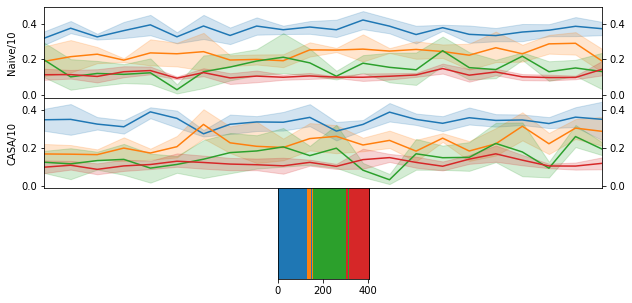

In [2]:
plot_validation_curves(['../training_configs/lidc_naive_10.yml',
                                '../training_configs/lidc_casa_10.yml'], 
                               names=['Naive/10', 'CASA/10'], seeds=[1, 2, 3, 4, 5])

FileNotFoundError: [Errno 2] No such file or directory: '../training_configs/lidc_uncertainty_10.yml'

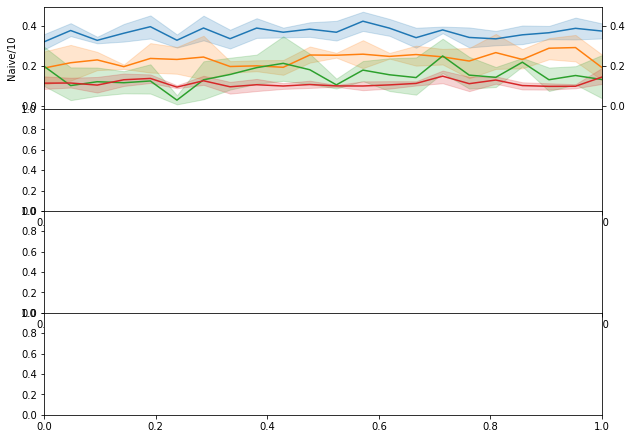

In [2]:
plot_validation_curves(['../training_configs/lidc_naive_10.yml',
                        '../training_configs/lidc_uncertainty_10.yml',
                                '../training_configs/lidc_casa_10.yml'], 
                               names=['Naive/10', 'Uncertainty/10', 'CASA/10'], seeds=[1, 2, 3, 4, 5])

In [2]:
eval_config('../training_configs/lidc_base.yml').round(3)

,Unnamed: 0,ges,geb,sie,lndb
0,0,0.644,0.458,0.807,0.159


In [3]:
df_overview = eval_config_list(['../training_configs/lidc_casa_5.yml',  '../training_configs/lidc_casa_8.yml', '../training_configs/lidc_casa_10.yml', '../training_configs/lidc_casa_20.yml'], 
                               ['CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5], split='test')
df_overview.round(3)

,model,Unnamed: 0,ges,geb,sie,lndb,seed
0,CASA/10,0,0.664,0.543,0.816,0.229,3
1,CASA/20,0,0.648,0.476,0.802,0.206,3
2,CASA/5,0,0.684,0.577,0.799,0.297,3
3,CASA/8,0,0.697,0.536,0.806,0.265,3


In [5]:
df_overview = eval_config_list(['../training_configs/lidc_casa_5.yml',  '../training_configs/lidc_casa_8.yml', '../training_configs/lidc_casa_10.yml', '../training_configs/lidc_casa_20.yml'], 
                               ['CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5], split='test', value='std')
df_overview.round(3)

,model,Unnamed: 0,ges,geb,sie,lndb,seed
0,CASA/10,0.0,0.016,0.080,0.005,0.026,1.581
1,CASA/20,0.0,0.031,0.025,0.009,0.025,1.581
2,CASA/5,0.0,0.005,0.056,0.015,0.043,1.581
3,CASA/8,0.0,0.033,0.032,0.013,0.020,1.581


In [6]:
df_overview = eval_config_list(['../training_configs/lidc_naive_5.yml',  '../training_configs/lidc_naive_8.yml', '../training_configs/lidc_naive_10.yml', '../training_configs/lidc_naive_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20'], seeds=[1, 2, 3, 4, 5], split='test')
df_overview.round(3)

,model,Unnamed: 0,ges,geb,sie,lndb,seed
0,Naive/10,0,0.619,0.472,0.765,0.184,3
1,Naive/20,0,0.640,0.461,0.774,0.201,3
2,Naive/5,0,0.680,0.465,0.760,0.231,3
3,Naive/8,0,0.663,0.463,0.813,0.209,3


In [8]:
df_overview = eval_config_list(['../training_configs/lidc_naive_5.yml',  '../training_configs/lidc_naive_8.yml', '../training_configs/lidc_naive_10.yml', '../training_configs/lidc_naive_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20'], seeds=[1, 2, 3, 4, 5], split='test', value='std')
df_overview.round(3)

,model,Unnamed: 0,ges,geb,sie,lndb,seed
0,Naive/10,0.0,0.025,0.057,0.041,0.019,1.581
1,Naive/20,0.0,0.025,0.035,0.040,0.021,1.581
2,Naive/5,0.0,0.014,0.055,0.016,0.019,1.581
3,Naive/8,0.0,0.036,0.051,0.006,0.015,1.581


In [13]:
df = eval_config('../training_configs/lidc_uncertainty.yml', seeds=[1, 2, 3, 4, 5], shifts=['geb', 'sie', 'lndb'])
df.mean().round(3)

Unnamed: 0    0.000
ges           0.650
geb           0.394
sie           0.738
lndb          0.180
bwt          -0.003
fwt          -0.015
seed          3.000
dtype: float64

In [14]:
df = eval_config('../training_configs/lidc_uncertainty.yml', seeds=[1, 2, 3, 4, 5], shifts=['geb', 'sie', 'lndb'])
df.std().round(3)

Unnamed: 0    0.000
ges           0.011
geb           0.058
sie           0.038
lndb          0.021
bwt           0.048
fwt           0.023
seed          1.581
dtype: float64

In [9]:
df = eval_config('../training_configs/lidc_casa_10.yml', seeds=[1, 2, 3, 4, 5], shifts=['geb', 'sie', 'lndb'])
df.std().round(3)

Unnamed: 0    0.000
ges           0.016
geb           0.080
sie           0.005
lndb          0.026
bwt           0.037
fwt           0.036
seed          1.581
dtype: float64

In [12]:
df = eval_config('../training_configs/lidc_naive_10.yml', seeds=[1, 2, 3, 4, 5], shifts=['geb', 'sie', 'lndb'])
df.std().round(3)

Unnamed: 0    0.000
ges           0.025
geb           0.057
sie           0.041
lndb          0.019
bwt           0.025
fwt           0.009
seed          1.581
dtype: float64

In [21]:
df_temp = df.loc[df.seed==1]

bwt = 0.0
fwt = 0.0
order = ['ges', 'geb', 'sie', 'lndb']

for i in range(len(order) - 1):
    bwt += df_temp.loc[df_temp['shift'] == 'None'][order[i]].values[0] - \
        df_temp.loc[df_temp['shift'] == order[i + 1]][order[i]].values[0]

bwt /= len(order) - 1

order.append('None')
for i in range(2, len(order)):
    fwt += df_temp.loc[df_temp['shift'] == order[i]][order[i-1]].values[0] - \
        df_temp.loc[df_temp['shift'] == order[1]][order[i-1]].values[0]
    
fwt /= len(order) - 1

print(bwt, fwt)

0.06624551655313222 -0.03645012491024393


In [16]:
bwt

0.1987365496593967

In [3]:
eval_config('../training_configs/lidc_uncertainty.yml', seeds=[1, 2, 3, 4, 5]).mean().round(3)

Unnamed: 0    0.000
ges           0.650
geb           0.394
sie           0.738
lndb          0.180
seed          3.000
dtype: float64

In [7]:
eval_config('../training_configs/lidc_joint.yml', seeds=[1, 2, 3, 4, 5]).std().round(3)

Unnamed: 0    0.000
ges           0.033
geb           0.037
sie           0.017
lndb          0.024
seed          1.581
dtype: float64

In [3]:
eval_config('../training_configs/lidc_ges.yml', seeds=[1, 2, 3, 4, 5]).std().round(3)

Unnamed: 0    0.000
ges           0.036
geb           0.080
sie           0.037
lndb          0.022
seed          1.581
dtype: float64

In [4]:
eval_config('../training_configs/lidc_geb.yml', seeds=[1, 2, 3, 4, 5]).std().round(3)

Unnamed: 0    0.000
ges           0.072
geb           0.060
sie           0.109
lndb          0.019
seed          1.581
dtype: float64

In [5]:
eval_config('../training_configs/lidc_sie.yml', seeds=[1, 2, 3, 4, 5]).std().round(3)

Unnamed: 0    0.000
ges           0.087
geb           0.046
sie           0.102
lndb          0.037
seed          1.581
dtype: float64

In [6]:
eval_config('../training_configs/lidc_lndb.yml', seeds=[1, 2, 3, 4, 5]).std().round(3)

Unnamed: 0    0.000
ges           0.045
geb           0.076
sie           0.052
lndb          0.062
seed          1.581
dtype: float64

In [5]:
pd.read_csv('/project/catinous/active_catinous/MELBA/output/trained_memory/lidc_cont_lungnodulesfinallndbBig_basemodel_batch_memory_tf08_1_22c589d95b.csv').groupby(['scanner']).count()

,filepath,pseudodomain,target
scanner,,,
geb,26,26,26
ges,28,28,28
lndb,46,46,46
sie,28,28,28


In [9]:
pd.read_csv('/project/catinous/lungnodulesfinallndbBig.csv')

,dataset,scanner,patient_id,image,x1,x2,y1,y2,bin_malignancy,split
0,lidc,ges,LIDC-IDRI-0001,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,300.0,333.0,351.0,384.0,1,base
1,lidc,ges,LIDC-IDRI-0003,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,354.0,380.0,337.0,363.0,0,val
2,lidc,ges,LIDC-IDRI-0003,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,303.0,313.0,193.0,203.0,1,val
3,lidc,ges,LIDC-IDRI-0003,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,214.0,229.0,212.0,227.0,1,val
4,lidc,ges,LIDC-IDRI-0004,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,140.0,145.0,321.0,326.0,0,test
...,...,...,...,...,...,...,...,...,...,...
1492,lndb,lndb,305,/data/dataset/external/LNDb/dicom/LNDb-0305-01...,104.0,111.0,333.0,340.0,1,train
1493,lndb,lndb,305,/data/dataset/external/LNDb/dicom/LNDb-0305-01...,422.0,428.0,225.0,231.0,1,train
1494,lndb,lndb,307,/data/dataset/external/LNDb/dicom/LNDb-0307-02...,224.0,230.0,379.0,385.0,1,train
1495,lndb,lndb,310,/data/dataset/external/LNDb/dicom/LNDb-0310-00...,65.0,69.0,254.0,258.0,1,train
